<a href="https://colab.research.google.com/github/devyulbae/AIClass/blob/main/Q4_Sine_regression_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 싸인 함수 회귀분석 (Sine Regression)

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, Sequential
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.15.0


## 데이터 생성

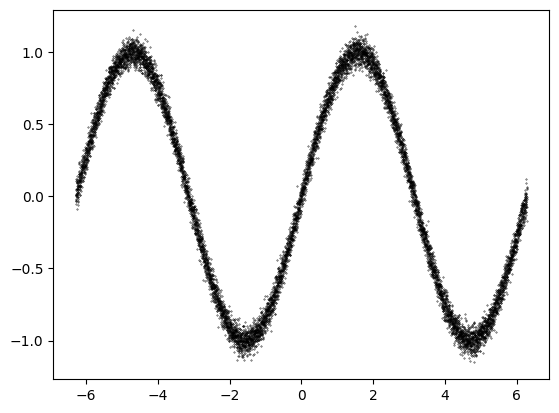

In [2]:
# generate the data
inputs = np.linspace(-2*np.pi, 2*np.pi, 10000)[:, None]
outputs = np.sin(inputs) + 0.05 * np.random.normal(size=[len(inputs),1])

plt.scatter(inputs[:, 0], outputs[:, 0], s=0.1, color='k', marker='o')

## 모델 정의

In [3]:
model = Sequential([
    layers.Dense(32, activation='relu', input_shape=(1,)),
    layers.Dense(16, activation='relu'),
    layers.Dense(1)  # output layer에는 활성화 함수를 사용하지 않음
])

## 모델 훈련

In [4]:
model.compile(optimizer='adam',
              loss='mae',
              metrics=['mae']) # mae - Mean Absolute Error : 평균 절대 오차

model.fit(inputs, outputs, epochs=40) # (, validation_split=0.1)
# 1. epoch 개수를 늘릴수록 곡선이 매끄러워짐. 25부터 모델이 깨지지 않고 완전히 학습됨.
# 2. validation set를 추가하면 오히려 모델이 뒷부분에서 깨짐. 데이터의 뒷부분을 slicing해서 검증용으로 사용하는 것으로 추정.

Epoch 1/40
313/313 [==============================] - 3s 4ms/step - loss: 0.4074 - mae: 0.4074
Epoch 2/40
313/313 [==============================] - 1s 4ms/step - loss: 0.2653 - mae: 0.2653
Epoch 3/40
313/313 [==============================] - 1s 4ms/step - loss: 0.2552 - mae: 0.2552
Epoch 4/40
313/313 [==============================] - 1s 4ms/step - loss: 0.2461 - mae: 0.2461
Epoch 5/40
313/313 [==============================] - 1s 4ms/step - loss: 0.2367 - mae: 0.2367
Epoch 6/40
313/313 [==============================] - 1s 4ms/step - loss: 0.2276 - mae: 0.2276
Epoch 7/40
313/313 [==============================] - 1s 4ms/step - loss: 0.2208 - mae: 0.2208
Epoch 8/40
313/313 [==============================] - 2s 5ms/step - loss: 0.2140 - mae: 0.2140
Epoch 9/40
313/313 [==============================] - 2s 6ms/step - loss: 0.2089 - mae: 0.2089
Epoch 10/40
313/313 [==============================] - 2s 5ms/step - loss: 0.2032 - mae: 0.2032
Epoch 11/40
313/313 [============================

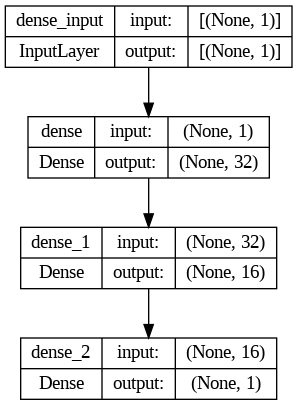

In [5]:
# layer 시각화
tf.keras.utils.plot_model(model, show_shapes=True)

In [6]:
test_loss, test_mae = test_output_pred = model.evaluate(inputs, outputs, verbose=0)
print('Test MAE:', test_mae)

Test MAE: 0.04898862913250923


## 테스트

313/313 [==============================] - 1s 1ms/step


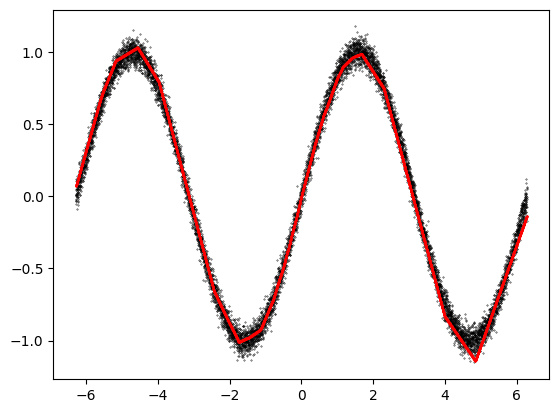

In [7]:
test_output_pred = model.predict(inputs)

plt.scatter(inputs[:, 0], outputs[:, 0], c='k', marker='o', s=0.1)
plt.scatter(inputs[:, 0], test_output_pred[:, 0], c='r', marker='o', s=0.1)